<a href="https://colab.research.google.com/github/IlyaKonoval/Medical-Cost-Personal/blob/eda/Medical_Cost_Personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Загрузка данных и импорт библиотек

In [ ]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

С помощью google drive импортируем данные

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
project_path = "/content/drive/MyDrive/Medical-Cost-Personal/insurance.csv"
df = pd.read_csv(project_path)


Mounted at /content/drive


# 2. Подготовка датасета

age: возраст основного выгодоприобретателя

sex: пол страхового агента, женщина, мужчина

bmi: индекс массы тела, обеспечивающий понимание тела, веса, который является относительно высоким или низким по отношению к росту, объективный показатель массы тела (кг/м^2), использующий отношение роста к весу, в идеале от 18,5 до 24,9

children: Количество детей, охваченных медицинским страхованием / Количество иждивенцев

smoker: Курение

region: район проживания бенефициара в США, северо-восток, юго-восток, юго-запад, северо-запад.

charges: Индивидуальные медицинские расходы, выставленные медицинским страхованием.

Проверим размеры таблицы и пропуски в ней


In [ ]:
df.shape

(1337, 7)

Проверим данные на дупликаты

In [ ]:
df.drop_duplicates(inplace=True)

После проверки мы видим что одна пара данных была одинаковой


In [ ]:
df.shape

(1337, 7)

У нас нет пропусков,
4 некатегориальных признака,
3 категориальных


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


По графикам мы видим что индексы тела имеют нормальное распределение, большинство людей моложе 25 лет и большинство людей не имеют детей. Следуя из этого можно видить что в основном затраты на мед. услуги меньше 20000

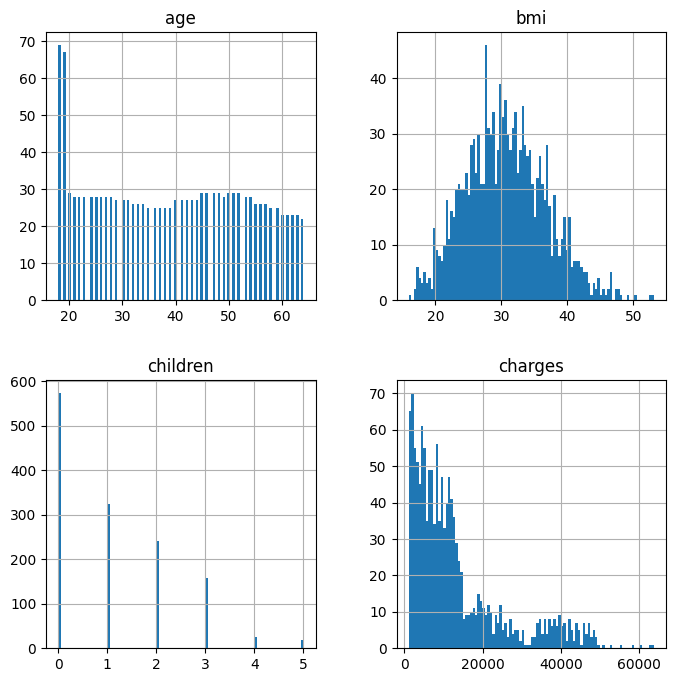

In [ ]:
df.hist(bins=100, figsize=(8,8));

# 3. Однофакторный анализ

## Дети:

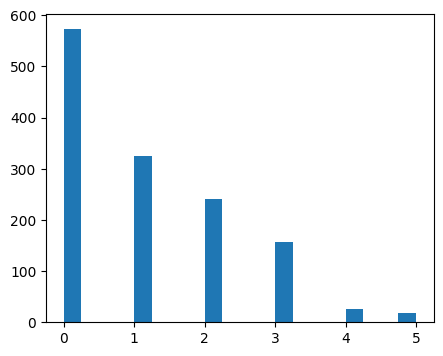

In [ ]:
plt.figure(figsize=(5,4))

plt.hist(df.children, bins=20);

Больше 42% людей не имеют детей

In [ ]:
len(df[df.children == 0])/ len(df)

0.42857142857142855

По графику мы видим что количество детей не сильно влияет на затраты

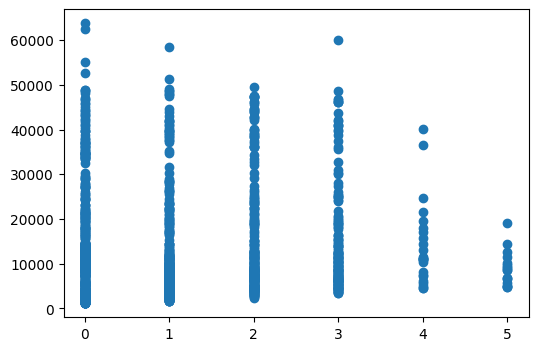

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(df.children, df.charges);

Это подтверждается матрицей корреляции

In [ ]:
np.corrcoef(df.children, df.charges)[0][1]

0.06738935083963243

## Индекс массы тела:

16 и менее	Выраженный дефицит массы тела

16-18,5	Недостаточная (дефицит) масса тела

18,5-25	Норма

25-30	Избыточная масса тела (предожирение)

30-35	Ожирение первой степени

35-40	Ожирение второй степени

40 и более	Ожирение третьей степени (морбидное)


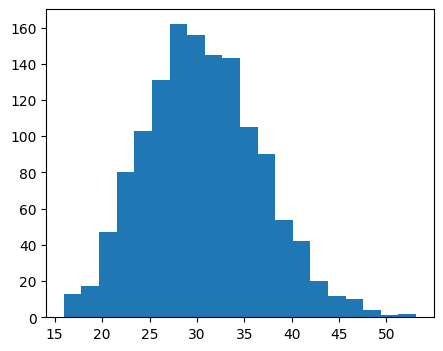

In [ ]:
plt.figure(figsize=(5,4))

plt.hist(df.bmi, bins=20);

Самый высокий (53.13) и самый низкий (15.96) индексы массы тела

In [ ]:
df.bmi.min() , df.bmi.max()

(15.96, 53.13)

Всего 225 человек из 1337 имеют нормальный индекс тела, что в процентном соотношении 16.8%

In [ ]:
print(len(df[(df.bmi >= 18.5) & (df.bmi < 25)]))
print(len(df[(df.bmi >= 18.5) & (df.bmi < 25)]) / len(df) * 100)

225
16.828721017202692


Больше половины всех людей (706 человек) страдают ожирением

In [ ]:
print(len(df[df.bmi >= 30]))
print(len(df[df.bmi >= 30]) / len(df) * 100)

706
52.80478683620045


У 20 человек недостаточный вес

In [ ]:
print(len(df[df.bmi < 18.5]))
print(len(df[df.bmi < 18.5]) / len(df) * 100)

20
1.4958863126402393


Остальные люди находятся в стадии предожирения

In [ ]:
print(len(df[(df.bmi >= 25) & (df.bmi < 30)]))

386


По графику можно предположить что у людей с большим весом, расходы выше

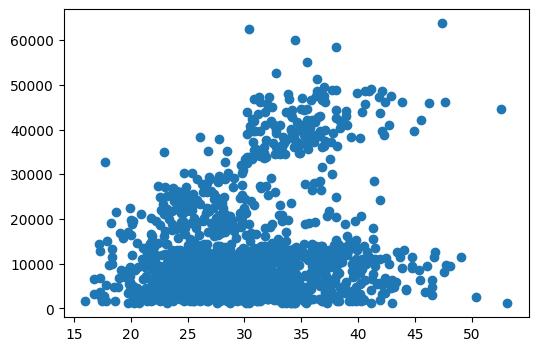

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(df.bmi, df.charges);

In [ ]:
np.corrcoef(df.bmi, df.charges)[0][1]

0.19840083122624938

## Возраст

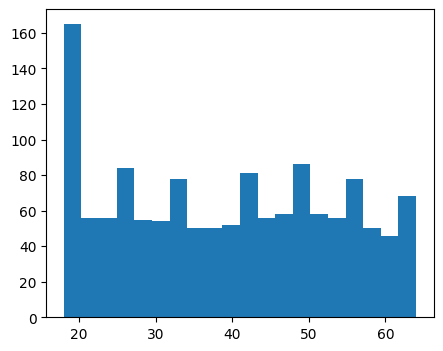

In [ ]:
plt.figure(figsize=(5,4))

plt.hist(df.age, bins=20);

Наименьший возраст 18, наибольший 64

In [ ]:
df.age.min(), df.age.max()

(18, 64)

Можно сказать, что чем старше человек, тем больше у него расходы.

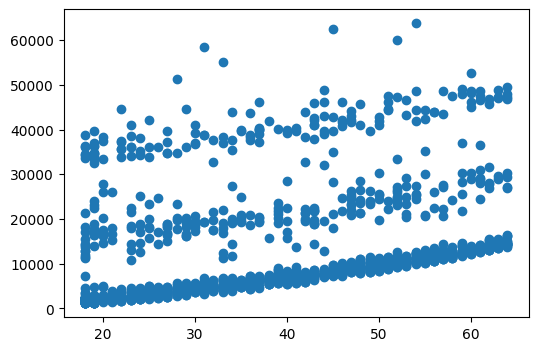

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(df.age, df.charges);

In [ ]:
np.corrcoef(df.age, df.charges)[0][1]

0.2983082125097864

Больше всего тратят люди 43 лет

In [ ]:
df.groupby('age').agg(ChargesMedian=('charges','median')).sort_values(by='ChargesMedian', ascending=False)

,ChargesMedian
age,
43,18767.737700
64,15528.758375
63,14349.854400
62,13844.797200
61,13635.637900
60,13204.285650
59,12928.791100
58,11931.125250
57,11893.878225


##Курильщики


Количество не курящих превосходит, количество курящих

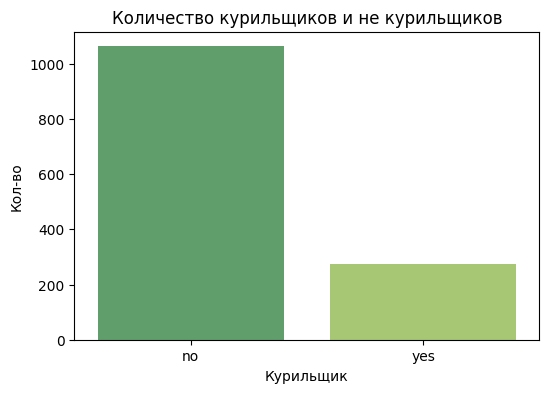

In [ ]:
smoker_counts = df['smoker'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=smoker_counts.index, y=smoker_counts.values, hue=smoker_counts.index, palette='summer')
plt.title('Количество курильщиков и не курильщиков')
plt.xlabel('Курильщик')
plt.ylabel('Кол-во')
plt.show()

По графику видно, что большинство курильщиков - мужчины. Хотя не на много

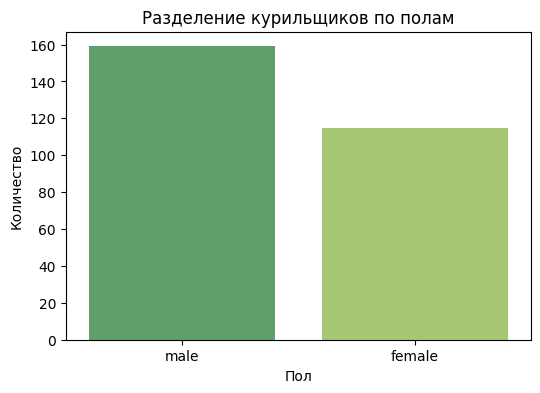

In [ ]:
smokers_by_sex = df['sex'][df['smoker'] == "yes"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=smokers_by_sex.index, y=smokers_by_sex.values, hue=smokers_by_sex.index, palette='summer')
plt.title('Разделение курильщиков по полам')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

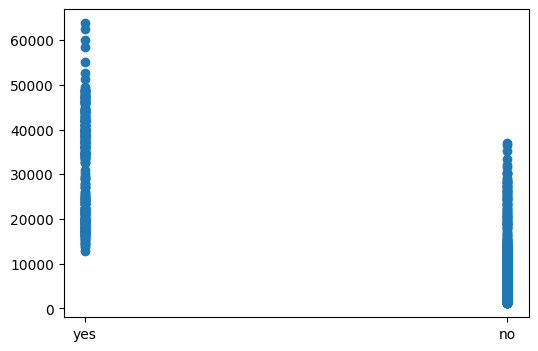

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(df.smoker, df.charges);

В среднем курильщики тратят больше денег на услуги

In [ ]:
df.groupby('smoker').agg(ChargesMedian=('charges','median')).sort_values(by='ChargesMedian', ascending=False)

,ChargesMedian
smoker,
yes,34456.34845
no,7345.72660


## Пол

По нашим данным видно, что мужчин и женщин было примерно равное количество

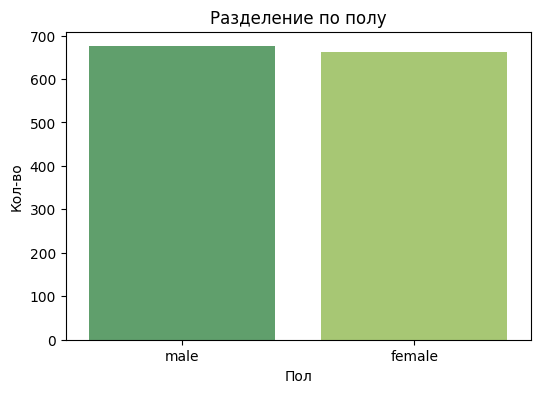

In [ ]:
sex_counts = df['sex'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=sex_counts.index, y=sex_counts.values, hue=sex_counts.index, palette='summer')
plt.title('Разделение по полу')
plt.xlabel('Пол')
plt.ylabel('Кол-во')
plt.show()

Сумма затрат на услуги также примерно равна

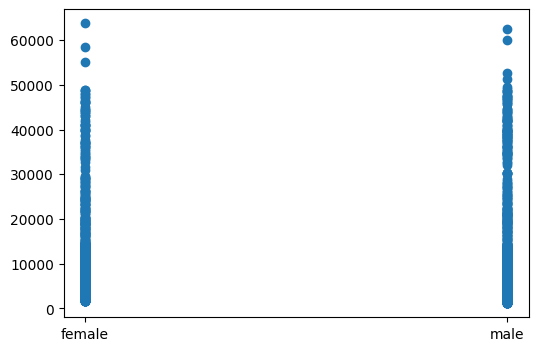

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(df.sex, df.charges);

В среднем курящие мужчины тратят больше, чем курящие женщины. Но не курящие женщины тратят больше чем не курящие мужчины

In [ ]:
df.groupby(['smoker','sex']).agg(ChargesMedian=('charges','median')).sort_values(by='ChargesMedian', ascending=False)

ChargesMedian
smoker sex                  
yes    male     36085.219000
       female   28950.469200
no     female    7639.417450
       male      6986.101975

## Регион

По графику видно, что в регионе southeast живут больше всего человек

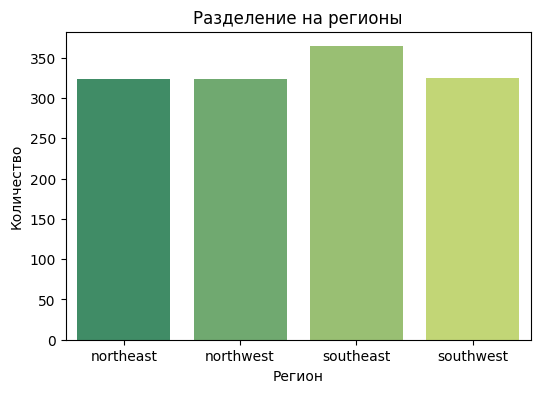

In [ ]:
regieon_counts = df['region'].value_counts()

regieon_counts = regieon_counts.sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=regieon_counts.index, y=regieon_counts.values, hue=regieon_counts.index, palette='summer')
plt.title('Разделение на регионы')
plt.xlabel('Регион')
plt.ylabel('Количество')
plt.show()

Затраты также самые высокие в southeast

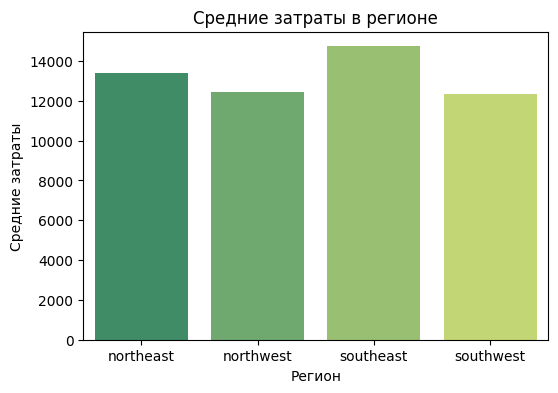

In [ ]:
mean_charges_by_region = df.groupby('region')['charges'].mean().reset_index()


plt.figure(figsize=(6,4))
sns.barplot(x='region', y='charges', hue='region', data=mean_charges_by_region, palette='summer')
plt.title('Средние затраты в регионе')
plt.xlabel('Регион')
plt.ylabel('Средние затраты')
plt.show()

Однако медианные значения показывают, что в northeast затраты больше.

In [ ]:
df.groupby('region').agg(ChargesMedian=('charges','median')).sort_values(by='ChargesMedian', ascending=False)

,ChargesMedian
region,
northeast,10057.652025
southeast,9294.131950
northwest,8976.977250
southwest,8798.593000


# 4. Корреляционный анализ

## Корреляция Пирсона

По корреляции Пирсона мы видим, что наибольшую некатегариальную корреляцию с нашей целевой переменной имеют возраст и ИМТ.

<Axes: >

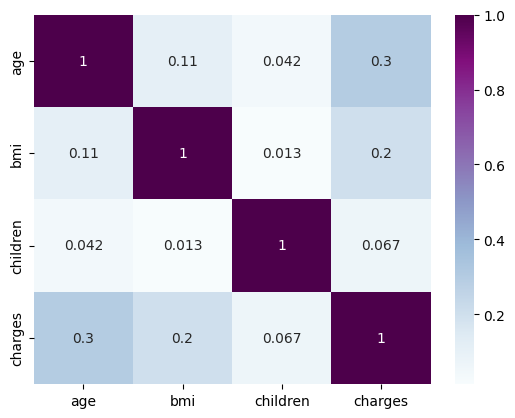

In [ ]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, cmap='BuPu', annot=True)

## Корреляция Спирмена

По корреляции Спирмена мы видим, что значение возраста сильно возрасло, а ИМТ снизилось. Из этого следует, что возраст имеет более сильную связь с целевой переменной, чем ИМТ.

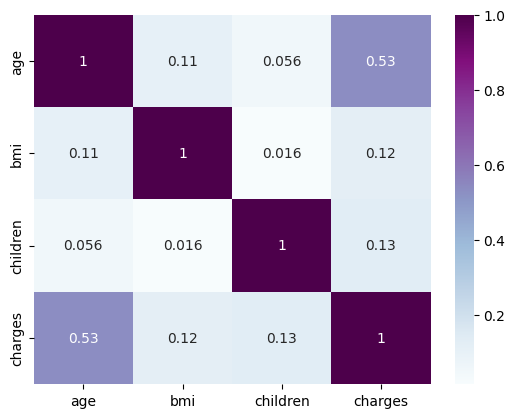

In [ ]:
corr = df.corr(numeric_only=True, method='spearman')

sns.heatmap(corr, cmap="BuPu", annot=True);

## V-мера Крамера(χ2)

По таблице можно сделать вывод что категориальные признаки почти не зависимы друг от друга

In [ ]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,sex,smoker,region
sex,1.000000,0.076596,0.018887
smoker,0.076596,1.000000,0.073780
region,0.018887,0.073780,1.000000


## ANOVA

По нашей таблице мы видим, что на затраты влияют: пол, курильщик ли человек, его ИМТ и в каком регионе он проживает. Также есть зависимость ИМТ от региона проживания

In [ ]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,sex,age,No
1,sex,bmi,No
2,sex,children,No
3,sex,charges,Yes
4,smoker,age,No
5,smoker,bmi,No
6,smoker,children,No
7,smoker,charges,Yes
8,region,age,No
9,region,bmi,Yes


# 5. Анализ целевой переменной

Целевая переменная имеет логарифмическое распределение что может сильно испортить обучение модели.

1) Из-за 'хвоста' обучение может быть искажено

2) Многе модели имеют низкую производительность на логарифмическом распределении

3) Для последующей работы с данными нужно произвести логарифмическое преобразование

<Axes: xlabel='charges', ylabel='Count'>

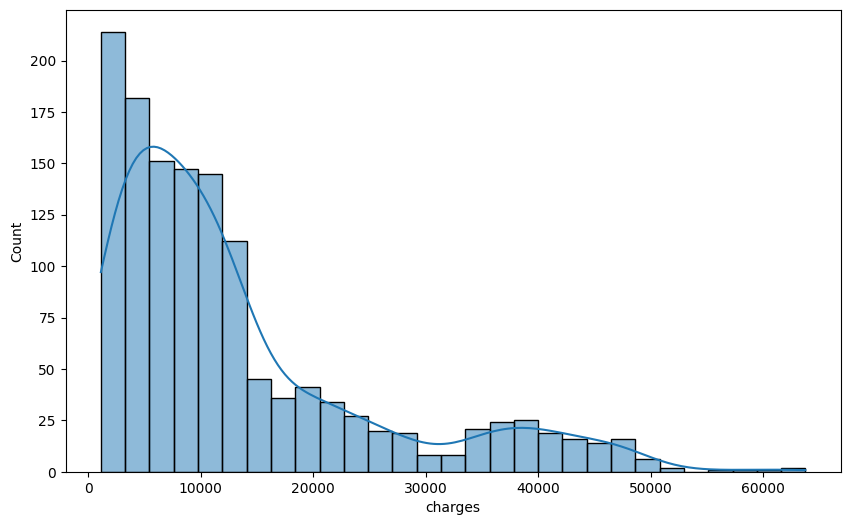

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df['charges'], kde=True)

После логарифмического преобразования график похож на нормальное распределение

<Axes: xlabel='charges', ylabel='Count'>

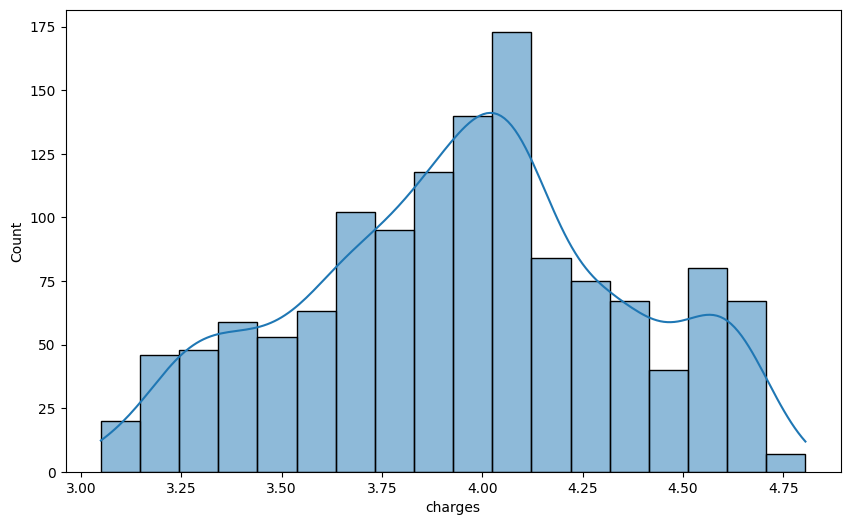

In [ ]:
df['charges'] = np.log10(df['charges'])

plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)

# 6. Polaris vs Pandas

## Увеличение датасета

In [ ]:
!pip install polars
import polars as pl

Увеличиваем искусственно датасет до 1000000

In [ ]:
df_big = df.copy()

for i in range(1000):
  df_big = pd.concat([df_big, df])
df_big.to_csv("df_big.csv", index=False)

In [ ]:
df_big.shape

(1338337, 7)

## Загрузка данных

На датасете в 1000000 данных polaris работает быстрее

In [ ]:
%%time

df_pl = pl.read_csv("df_big.csv")

CPU times: user 691 ms, sys: 223 ms, total: 914 ms
Wall time: 788 ms


In [ ]:
%%time

df = pd.read_csv("df_big.csv")

CPU times: user 1.42 s, sys: 191 ms, total: 1.61 s
Wall time: 2.48 s


## Фильтрация данных

По проведенным тестам можно сказать что Polaris для фильтрации данных работает быстрее

### Тест 1

In [ ]:
%%time

df.query("sex == 'male'")

CPU times: user 124 ms, sys: 2.34 ms, total: 126 ms
Wall time: 330 ms


,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,3.236928
2,28,male,33.000,3,no,southeast,3.648308
3,33,male,22.705,0,no,northwest,4.342116
4,32,male,28.880,0,no,northwest,3.587358
8,37,male,29.830,2,no,northeast,3.806615
...,...,...,...,...,...,...,...
1338323,31,male,25.935,1,no,northwest,3.627355
1338324,61,male,33.535,0,no,northeast,4.118706
1338326,51,male,30.030,1,no,southeast,3.972106
1338328,52,male,38.600,2,no,southwest,4.013899


In [ ]:
%%time

df_pl.filter(pl.col('sex') == 'male')

CPU times: user 114 ms, sys: 10.6 ms, total: 125 ms
Wall time: 402 ms


age,sex,bmi,children,smoker,region,charges
i64,str,f64,i64,str,str,f64
18,"""male""",33.77,1,"""no""","""southeast""",3.236928
28,"""male""",33.0,3,"""no""","""southeast""",3.648308
33,"""male""",22.705,0,"""no""","""northwest""",4.342116
32,"""male""",28.88,0,"""no""","""northwest""",3.587358
37,"""male""",29.83,2,"""no""","""northeast""",3.806615
25,"""male""",26.22,0,"""no""","""northeast""",3.43478
23,"""male""",34.4,0,"""no""","""southwest""",3.261701
27,"""male""",42.13,0,"""yes""","""southeast""",4.597824
19,"""male""",24.6,1,"""no""","""southwest""",3.264165


### Тест 2

In [ ]:
%%time

df.query("smoker == 'yes' & children > 3 & charges > 4.4")

CPU times: user 114 ms, sys: 2.76 ms, total: 117 ms
Wall time: 249 ms


,age,sex,bmi,children,smoker,region,charges
620,37,male,34.1,4,yes,southwest,4.604034
1957,37,male,34.1,4,yes,southwest,4.604034
3294,37,male,34.1,4,yes,southwest,4.604034
4631,37,male,34.1,4,yes,southwest,4.604034
5968,37,male,34.1,4,yes,southwest,4.604034
...,...,...,...,...,...,...,...
1332272,37,male,34.1,4,yes,southwest,4.604034
1333609,37,male,34.1,4,yes,southwest,4.604034
1334946,37,male,34.1,4,yes,southwest,4.604034
1336283,37,male,34.1,4,yes,southwest,4.604034


In [ ]:
%%time

df_pl.filter(pl.col('smoker') == 'yes',pl.col('children') > 3, pl.col('charges') > 4.4 )

CPU times: user 25.3 ms, sys: 546 µs, total: 25.8 ms
Wall time: 52.5 ms


age,sex,bmi,children,smoker,region,charges
i64,str,f64,i64,str,str,f64
37,"""male""",34.1,4,"""yes""","""southwest""",4.604034
37,"""male""",34.1,4,"""yes""","""southwest""",4.604034
37,"""male""",34.1,4,"""yes""","""southwest""",4.604034
37,"""male""",34.1,4,"""yes""","""southwest""",4.604034
37,"""male""",34.1,4,"""yes""","""southwest""",4.604034
37,"""male""",34.1,4,"""yes""","""southwest""",4.604034
37,"""male""",34.1,4,"""yes""","""southwest""",4.604034
37,"""male""",34.1,4,"""yes""","""southwest""",4.604034
37,"""male""",34.1,4,"""yes""","""southwest""",4.604034


## Агрегация данных

По тестам скорость Polaris выше чем у Pandas

### Тест 1

In [ ]:
%%time

df.groupby('smoker').agg(ChargesMedian=('charges','median'))

CPU times: user 171 ms, sys: 0 ns, total: 171 ms
Wall time: 417 ms


,ChargesMedian
smoker,
no,3.866035
yes,4.537269


In [ ]:
%%time

df_pl.groupby('smoker').agg([pl.median('charges')])

<timed eval>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.


CPU times: user 97.1 ms, sys: 44.4 ms, total: 141 ms
Wall time: 307 ms


smoker,charges
str,f64
"""yes""",4.537269
"""no""",3.866035


### Тест 2

In [ ]:
%%time

df.groupby('region').agg(ChargesMedian=('charges','median'))

CPU times: user 203 ms, sys: 1.46 ms, total: 204 ms
Wall time: 701 ms


,ChargesMedian
region,
northeast,4.002496
northwest,3.953130
southeast,3.968209
southwest,3.944413


In [ ]:
%%time

q = (
    df_pl
    .lazy()
    .groupby(by='region')
    .agg(
        [
            pl.col('charges').median()]
    )
)

CPU times: user 1.4 ms, sys: 0 ns, total: 1.4 ms
Wall time: 2.09 ms


<timed exec>:2: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.


In [ ]:
%%time

q.collect()

CPU times: user 99.6 ms, sys: 32.2 ms, total: 132 ms
Wall time: 191 ms


region,charges
str,f64
"""southwest""",3.944413
"""northwest""",3.95313
"""northeast""",4.002496
"""southeast""",3.968209


## После всех проведенных тестов на загрузку, фильтрацию и агрегацию данных на 1000000 значений можно точно сказать, что Polaris работает быстрее